# The purpose is to show the phoenix models

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

In [8]:
S.__version__

'0.9.9'

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels',\
               'ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[4])

In [11]:
filelist1=os.listdir(SEDfile_dir+'/phoenixm00') 
filelist2=os.listdir(SEDfile_dir+'/phoenixm05') 
filelist3=os.listdir(SEDfile_dir+'/phoenixm10') 
filelist4=os.listdir(SEDfile_dir+'/phoenixm15') 
filelist5=os.listdir(SEDfile_dir+'/phoenixm20') 
filelist6=os.listdir(SEDfile_dir+'/phoenixm25') 
filelist7=os.listdir(SEDfile_dir+'/phoenixm30') 
filelist8=os.listdir(SEDfile_dir+'/phoenixm35') 
filelist9=os.listdir(SEDfile_dir+'/phoenixm40') 
filelist10=os.listdir(SEDfile_dir+'/phoenixp03') 
filelist11=os.listdir(SEDfile_dir+'/phoenixp05') 

In [12]:
filelist=filelist1 + filelist2 + filelist3 + filelist4 + filelist5+ filelist6 + filelist7 + filelist8

In [13]:
filelist1_group = [os.path.join('phoenixm00',f) for f in filelist1 if f.endswith('.fits')]
filelist2_group = [os.path.join('phoenixm05',f) for f in filelist2 if f.endswith('.fits')]
filelist3_group = [os.path.join('phoenixm10',f) for f in filelist3 if f.endswith('.fits')]
filelist4_group = [os.path.join('phoenixm15',f) for f in filelist4 if f.endswith('.fits')]
filelist5_group = [os.path.join('phoenixm20',f) for f in filelist5 if f.endswith('.fits')]
filelist6_group = [os.path.join('phoenixm25',f) for f in filelist6 if f.endswith('.fits')]
filelist7_group = [os.path.join('phoenixm30',f) for f in filelist7 if f.endswith('.fits')]
filelist8_group = [os.path.join('phoenixm35',f) for f in filelist8 if f.endswith('.fits')]
filelist9_group = [os.path.join('phoenixm40',f) for f in filelist9 if f.endswith('.fits')]

In [14]:
filelist_group=filelist1_group + filelist2_group + filelist3_group + filelist4_group + filelist5_group+ \
filelist6_group + filelist7_group + filelist8_group + filelist9_group

In [15]:
#fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [16]:
#fits_files.remove('bzspectype.fits')

## Find the star-names in the files

In [17]:
fits_files=filelist_group

In [18]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [19]:
obj_headers[2]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FILENAME= 'phoenixm00_10800.fits' / Name of file                                
MAPKEY  = 'phoenix '           / Maping identifiyer for type of file.           
CONTACT = 'R. Diaz and M. McMaster' / Who created the file                      
CREATED = 'November 04 2011'   / Date the file was created                      
DESCRIPT= 'Phoenix Models BT-settl Allard et al. 03, 07,09'                     
FILE_TYP= 'Atmosphere Grid Model' / Type of file                                
SYSTEMS = 'etc,cdbs,pysynphot' / Systems that will use these files              
REASON  = 'Delivered to support JWST'                                           
TEFF    = '10800   '        

In [20]:
obj_temperatures = []
obj_log_z_all = []
index=0
for hdr in obj_headers: 
        obj_temp=float(obj_headers[index]['TEFF'])
        obj_logz=float(obj_headers[index]['LOG_Z'])
        obj_temperatures.append(obj_temp)
        obj_log_z_all.append(obj_logz)
        index+=1

In [21]:
obj_log_z_all

[-0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.5,

In [22]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [23]:
filelist[:5]

['phoenixm00_11600.fits',
 'phoenixm00_5200.fits',
 'phoenixm00_10800.fits',
 'phoenixm00_3100.fits',
 'phoenixm00_17500.fits']

In [24]:
fits_files=filelist

In [25]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('([a-z].+_[0-9].+).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append(thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [26]:
print obj_names2

['phoenixm00_11600', 'phoenixm00_5200', 'phoenixm00_10800', 'phoenixm00_3100', 'phoenixm00_17500', 'phoenixm00_10400', 'phoenixm00_4000', 'phoenixm00_2300', 'phoenixm00_7600', 'phoenixm00_6800', 'phoenixm00_70000', 'phoenixm00_60000', 'phoenixm00_6400', 'phoenixm00_12000', 'phoenixm00_34000', 'phoenixm00_24000', 'phoenixm00_56000', 'phoenixm00_46000', 'phoenixm00_69000', 'phoenixm00_25000', 'phoenixm00_35000', 'phoenixm00_47000', 'phoenixm00_57000', 'phoenixm00_68000', 'phoenixm00_11800', 'phoenixm00_16500', 'phoenixm00_2100', 'phoenixm00_4200', 'phoenixm00_10600', 'phoenixm00_3300', 'phoenixm00_5000', 'phoenixm00_11400', 'phoenixm00_7800', 'phoenixm00_61000', 'phoenixm00_6600', 'phoenixm00_13000', 'phoenixm00_7400', 'phoenixm00_55000', 'phoenixm00_45000', 'phoenixm00_37000', 'phoenixm00_27000', 'phoenixm00_18000', 'phoenixm00_7000', 'phoenixm00_14500', 'phoenixm00_6200', 'phoenixm00_3700', 'phoenixm00_2900', 'phoenixm00_5400', 'phoenixm00_11000', 'phoenixm00_63000', 'phoenixm00_2500',

In [27]:
obj_names=obj_names2

In [28]:
obj_files=filelist_group

In [29]:
objames_and_objfiles = zip(obj_names, obj_files)
objames_and_objtemp = zip(obj_names, obj_temperatures)
objtemp_and_objlogz = zip(obj_temperatures,obj_log_z_all)

## Make a dictionary of filenames

In [30]:
#OBJDict= {}
#for obj,thefile in objames_and_objfiles:
#    print obj,': '
#    OBJDict[obj]=thefile
#    print OBJDict[obj] 

## Plot the SED

11600.0
5200.0
10800.0
3100.0
17500.0
10400.0
4000.0
2300.0
7600.0
6800.0
70000.0
60000.0
6400.0
12000.0
34000.0
24000.0
56000.0
46000.0
69000.0
25000.0
35000.0
47000.0
57000.0
68000.0
11800.0
16500.0
2100.0
4200.0
10600.0
3300.0
5000.0
11400.0
7800.0
61000.0
6600.0
13000.0
7400.0
55000.0
45000.0
37000.0
27000.0
18000.0
7000.0
14500.0
6200.0
3700.0
2900.0
5400.0
11000.0
63000.0
2500.0
5800.0
4600.0
10200.0
6000.0
7200.0
15500.0
3900.0
10000.0
4400.0
2700.0
11200.0
5600.0
3500.0
62000.0
4800.0
44000.0
54000.0
26000.0
36000.0
19000.0
9600.0
8800.0
8400.0
51000.0
41000.0
19500.0
33000.0
23000.0
15000.0
6900.0
6500.0
67000.0
3000.0
5300.0
2200.0
48000.0
58000.0
4100.0
6700.0
14000.0
66000.0
4300.0
2000.0
5100.0
59000.0
49000.0
3200.0
9800.0
8600.0
9400.0
18500.0
40000.0
50000.0
22000.0
32000.0
5500.0
64000.0
2800.0
3600.0
4700.0
5900.0
16000.0
2400.0
13500.0
29000.0
39000.0
6300.0
30000.0
20000.0
9000.0
8200.0
52000.0
42000.0
8000.0
21000.0
31000.0
43000.0
53000.0
9200.0
2600.0
65000.0
450

43000.0
53000.0
3200.0
5100.0
6700.0
12500.0
38000.0
28000.0
8600.0
65000.0
9800.0
9400.0
17000.0
51000.0
41000.0
19500.0
33000.0
23000.0
6300.0
3600.0
2800.0
5500.0
2400.0
5900.0
4700.0
9000.0
48000.0
58000.0
8200.0
15000.0
67000.0
8000.0
9200.0
59000.0
49000.0
14000.0
66000.0
18500.0
6100.0
40000.0
50000.0
22000.0
32000.0
3800.0
4500.0
2600.0
5700.0
3400.0
4900.0
6900.0
23000.0
33000.0
41000.0
51000.0
6500.0
19500.0
3000.0
5300.0
2200.0
4100.0
58000.0
48000.0
9600.0
8800.0
8400.0
67000.0
15000.0
9800.0
49000.0
59000.0
8600.0
9400.0
66000.0
14000.0
6700.0
32000.0
22000.0
18500.0
50000.0
40000.0
4300.0
2000.0
5100.0
3200.0
39000.0
29000.0
13500.0
9000.0
16000.0
64000.0
8200.0
2800.0
5500.0
3600.0
42000.0
52000.0
20000.0
30000.0
4700.0
2400.0
5900.0
6300.0
2600.0
53000.0
43000.0
3800.0
4500.0
3400.0
4900.0
31000.0
21000.0
5700.0
6100.0
28000.0
38000.0
12500.0
8000.0
17000.0
9200.0
65000.0
12000.0
60000.0
70000.0
10400.0
11600.0
10800.0
17500.0
5200.0
3100.0
69000.0
4000.0
2300.0
46000.0

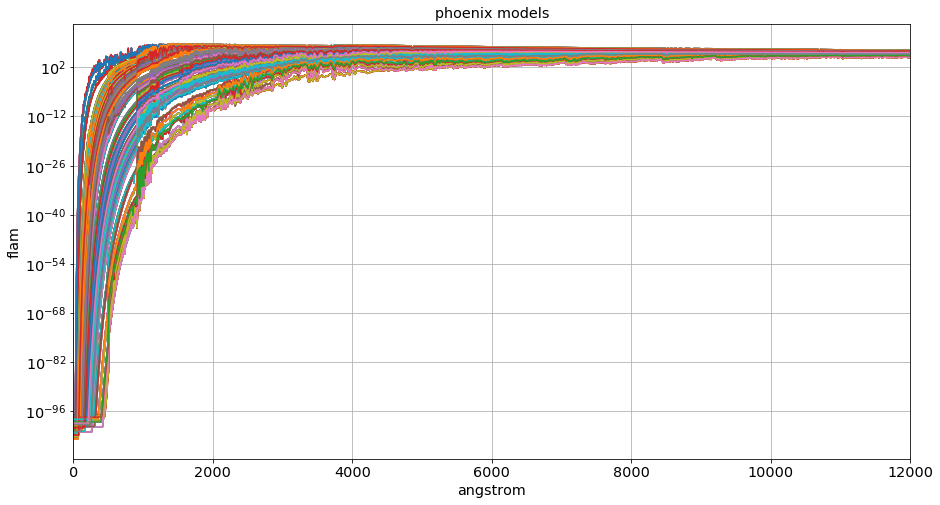

In [31]:
#for keyobj in OBJDict:
#    the_file=OBJDict[keyobj]
#    selected_file=the_file
#    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
#    print selected_fullfile
#    sed=S.FileSpectrum(selected_fullfile)
#    dirs(sed)       
for temp,logz in objtemp_and_objlogz:
    print temp
    sed = S.Icat('phoenix', temp,0.1,0.1)    
    plt.semilogy(sed.wave,sed.flux)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.title("phoenix models")
    plt.savefig("phoenix.png")

In [32]:
help(S.Icat)

Help on class Icat in module pysynphot.catalog:

class Icat(pysynphot.spectrum.TabularSourceSpectrum)
 |  This class constructs a model from the grid available in
 |  :ref:`catalogs <pysynphot-spec-atlas>`.
 |  Specifically, they are :ref:`pysynphot-appendixa-ck04`,
 |  :ref:`pysynphot-appendixa-kurucz1993`, and
 |  :ref:`pysynphot-appendixa-phoenix`.
 |  
 |  Each grid contains a master file named "catalog.fits", as
 |  defined by ``pysynphot.locations.CAT_TEMPLATE``.
 |  The basis spectra are located at ``pysynphot.locations.KUR_TEMPLATE``.
 |  You may inspect the data files in CRDS to see how they
 |  are formatted.
 |  
 |  Parameters
 |  ----------
 |  catdir : {'ck04models', 'k93models', 'phoenix'}
 |      Name of directory holding the catalogs.
 |  
 |  Teff : float
 |      Effective temperature of model, in Kelvin.
 |  
 |  metallicity : float
 |      Metallicity of model.
 |  
 |  log_g : float
 |      Log surface gravity of model.
 |  
 |  Attributes
 |  ----------
 |  name :